In [ ]:
!  pip install plotly

In [ ]:
! pip install cufflinks

## Introduction
Even after sixth week into nationwide lockdown, stay home practices, social distancing some provinces in Canada still show a rise in the COVID-19 cases despite measures are taken to slow it down. This exponential trend is anticipated to continue for another few weeks, even if preventive actions are in place today as expected with any epidemiological curve. Canada data source: https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html



## Exploratory Analysis

## Latest update: April 19, 2020

The COVID-19 outbreak is currently severe in Quebec (17,521 confirmed /805 deaths/ mortality rate 4.6% among confirmed) and Ontario (10,578 confirmed /553 deaths / mortality rate 5.2%), refer to Fig.3 & 4 below. Whereas, initially British Columbia and Alberta had shown an increase in virus infection in early March but somehow both provinces managed to flatten the curve (Fig 3). In fact, Quebec was the first province to impose state/ public health emergency in relation to the COVID -19 on March 13th, 2020, and then Ontario, Alberta, and British Columbia followed on March 17 and March 18, 2020, respectively.

As of April 18, 2020, a total of (1561 confirmed / 78 deaths / mortality rate 4.8% among confirmed) reported by British Columbia and (2397 confirmed / 50 deaths / mortality rate 2%) by Alberta. It is evident that both BC and AB are flattening the curve (Fig 3). The reason could be due to less influx of COVID-19 super spreaders coming into the province or having a better integrated healthcare system (Fig:Timeline)

Whereas, it is slightly a different story for Ontario and Quebec. On February 9, 2020 nationwide airport screenings and 14- day mandatory quarantine measures were imposed on travelers coming into provinces. At the time Ontario reported only 3 confirmed and Quebec reported none COVID-19 cases. And, not until March 20th, 2020, which was exactly a month later, they have decided to close US- Canada borders for 30 days. At this time, confirmed cases rose to 311 in Ontario and 139 in Quebec respectively (Fig 3).

Since New York city has been one of the worst COVID-19 hit cities in the world and being a neighbor to New York city could be one of the reasons why Ontario and Quebec have been the worst among other Canadian provinces. First case in New York was reported on March 1st, then on March 9, 16 cases were recorded. By the end of March 25, the numbers reported were significantly higher in New York city (17800 cases).

It is possible that an influx of super spreaders returning into Ontario and Quebec during those peak periods and its aftermath are adding up to an increased number of cases in both provinces. Also, Canada health authorities have been monitoring the transmission of the virus via travel and community exposures, but data not made public at this point for further analysis. An epidemiological curve usually shows the progression of the infectious disease in an outbreak overtime.

Also, the COVID-19 virus has an incubation period of 14 days. So, there is an inherent delay between the date someone becomes infected and the date it is tested positive by health authorities. There are four possible cases associated with COVID-19 such as infected but not contagious and asymptomatic, infected, contagious but asymptomatic, infected contagious and symptomatic and lastly recovering, shows symptoms but not contagious. It really depends on who becomes exposed to and how the body's immune system responds to the virus.

## Conclusion

Ideally, to fight the pandemic is to completely stop the virus spread. It requires strategic efforts from both government and individuals as a collective society. Canada has passed the low curve stage where virus was spreading slower and few cases are reported in the earlier months and currently leading up to peak or higher curve stage where virus is spreading fast (it might last next few weeks –up to early May 2020) and then as with any epidemiological curve it will drop down at some point in time.

Meanwhile, as a collective society one can take measures such as keeping distance from vulnerable people, maintain social distancing, self-isolation, and good hygiene practices and lastly abide with government /health procedures to decrease the virus transmission.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import ticker 
import seaborn as sns
from datetime import datetime, timedelta,date
import plotly.express as px


#from plotly import __version__
#import cufflinks as cf
import plotly.offline as py
import plotly.express as px
#py.initnotebookmode(connected=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
init_notebook_mode(connected=True)
init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as gobj


In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# upload data files: covid19 & province_code
df = pd.read_csv('covid19_1904.csv',parse_dates = ['date'])
#df.dataframeName = 'covid19_1904.csv'
df1 = pd.read_csv('P_code.csv')
#df1.dataframeName = 'P_code.csv'
events= pd.read_csv('Canada_events.csv')
#events.dataframeName = 'Canada_events.csv'
df2 = pd.merge(df,
                df1,
                on = 'prname',
                how = 'inner')
#pd.to_datetime(df2['date'], infer_datetime_format =True)
#df2 = df2.sort_values(by="date")
df2.tail(2)

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,P_code
655,62,Nunavut,Nunavut,2020-04-18,0,0,0.0,0,304.0,0.0,NaN,NaN,NaN,NaN,NU
656,62,Nunavut,Nunavut,2020-04-19,0,0,0.0,0,304.0,0.0,NaN,NaN,NaN,NaN,NU


## Timeline (Events)

In [4]:
events['Death'] = events['Death'].fillna('0')
pd.to_datetime(events['Date'], infer_datetime_format =True)
events.drop('Description', axis = 1, inplace = True)
events.head()

,Date,Confirmed,Tested,Death,CA_events
0,31-Dec-19,0,0,0,China informed unknown virus
1,07-Jan-20,0,0,0,China confirmed COVID-19
2,15-Jan-20,0,0,0,The public health agency of Canada activates ...
3,22-Jan-20,0,0,0,Canada implements screening at 3 major airports
4,25-Jan-20,1,1,0,Canada confirms the first case of COVID-19


In [5]:
# plotted the timeline X = date vs Y = confirmed cases based on at the day of event.

fig = px.scatter(events, x='Date', y='Confirmed', size_max = 14, hover_name = 'CA_events', color ='CA_events')
fig.update_traces(marker=dict(size=8,line=dict(width =2, color ='DarkSlateGrey')),
                 selector=dict(mode='markers')),
fig.update_layout(uniformtext_minsize=5,uniformtext_mode='hide',
        title="Timeline of COVID-19 Confirmed Cases in Canada", 
        width =1200,
        height=700,
        xaxis_title =" Date (since January 31, 2020)",
        yaxis_title = "# of Confirmed Cases"),
        #xaxis.set_major_formatter(mdates.DateFormatter('%b %d')
py.offline.iplot(fig)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 15 columns):
pruid             657 non-null int64
prname            657 non-null object
prnameFR          657 non-null object
date              657 non-null datetime64[ns]
numconf           657 non-null int64
numprob           657 non-null int64
numdeaths         647 non-null float64
numtotal          657 non-null int64
numtested         586 non-null float64
numrecover        58 non-null float64
percentrecover    54 non-null float64
ratetested        0 non-null float64
numtoday          627 non-null float64
percentoday       627 non-null float64
P_code            657 non-null object
dtypes: datetime64[ns](1), float64(7), int64(4), object(3)
memory usage: 82.1+ KB


In [7]:
df2.columns

Index(['pruid', 'prname', 'prnameFR', 'date', 'numconf', 'numprob',
       'numdeaths', 'numtotal', 'numtested', 'numrecover', 'percentrecover',
       'ratetested', 'numtoday', 'percentoday', 'P_code'],
      dtype='object')

In [8]:
# Data cleaning and manipulation
# Drop columns
df2.drop(['pruid','prnameFR','numprob','percentrecover','ratetested','percentoday'],axis =1, inplace =True)
df2.head(2)

,prname,date,numconf,numdeaths,numtotal,numtested,numrecover,numtoday,P_code
0,Ontario,2020-01-31,3,0.0,3,NaN,NaN,3.0,ON
1,Ontario,2020-02-08,3,0.0,3,NaN,NaN,0.0,ON


In [9]:
# Replace following column names with: 
#'prname' with 'Province' |'date' with 'Date'|'numconf' with 'Confirmed'|'numdeaths' with 'Deaths'
# 'numtotal' with 'Total' |  'numtested' with 'Tested' |'numrecover' with 'Recovered'
df2.columns = ['Province','Date','Confirmed','Deaths','Total','Tested','Recovered', 'Daily_cases', 'P_code']
df2.head(2)

,Province,Date,Confirmed,Deaths,Total,Tested,Recovered,Daily_cases,P_code
0,Ontario,2020-01-31,3,0.0,3,NaN,NaN,3.0,ON
1,Ontario,2020-02-08,3,0.0,3,NaN,NaN,0.0,ON


In [10]:
# Drop "Repatriated travellers" from Province
df3 = df2.set_index('P_code')
df3.drop(['RT','CA'], inplace = True)
df3['Tested']=df3['Tested'].fillna('0')
df3['Recovered']=df3['Recovered'].fillna('0')
df3['Daily_cases']=df3['Daily_cases'].fillna('0')
df3.head(4)

,Province,Date,Confirmed,Deaths,Total,Tested,Recovered,Daily_cases
P_code,,,,,,,,
ON,Ontario,2020-01-31,3,0.0,3,0,0,3
ON,Ontario,2020-02-08,3,0.0,3,0,0,0
ON,Ontario,2020-02-16,3,0.0,3,0,0,0
ON,Ontario,2020-02-21,3,0.0,3,0,0,0


In [11]:
df3.isnull().sum()

Province       0
Date           0
Confirmed      0
Deaths         0
Total          0
Tested         0
Recovered      0
Daily_cases    0
dtype: int64

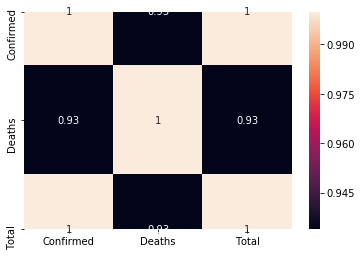

In [12]:
# Correlation test is performed to understand the relationship between confirmed, deaths and total cases
df3.corr()
plt.figure(figsize=(6,4))
sns.heatmap(df3.corr(), annot =True)

## Exponential Growth - Graphs

In [13]:
fig1 = px.line(df3, x='Date', y='Confirmed', color ='Province')
fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
title="Fig1: Trajectory of COVID-19 Confirmed Cases - Canada",              
        xaxis_title =" Date",
        yaxis_title = "# of Confirmed Cases")
        #yaxis_type ="log")
py.offline.iplot(fig1)

In [14]:
fig2 = px.line(df3, x='Date', y='Deaths',color ='Province')
fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
title="Fig2: Trajectory of COVID-19 Deaths - Canada",              
        xaxis_title =" # of Confirmed Cases",
        yaxis_title = "# of Deaths",
        yaxis_type ="log")
py.offline.iplot(fig2)

In [15]:
fig3 = px.line(df3, x='Confirmed', y='Deaths',color ='Province')
fig3.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
title="Fig3: COVID-19 Deaths Growing Exponetially in Canada",              
        xaxis_title =" # of Confirmed Cases",
        #xaxis_type ="log",
        yaxis_title = "# of Deaths",
        yaxis_type ="log")
py.offline.iplot(fig3)

The above figure shows the exponential growth in the number of COVID-19 confirmed and death cases in Canada as of April 18, 2020. This exponential trend is visible for some time despite the government activated public emergency operations on January 15th, 2020, and then followed by the travel ban and severe social distancing actions on March 13th, 2020 onwards.

## Mortality Rate

In [16]:
df4 = df2.set_index('P_code')
df4.drop(['RT','NWT', 'NU','YT','PE','NB','NS','NL','SK','MB','CA'], inplace = True)
df4['Tested']=df4['Tested'].fillna('0')
df4['Recovered']=df4['Recovered'].fillna('0')
df4['Daily_cases']=df4['Daily_cases'].fillna('0')
df4.head(2)

,Province,Date,Confirmed,Deaths,Total,Tested,Recovered,Daily_cases
P_code,,,,,,,,
ON,Ontario,2020-01-31,3,0.0,3,0,0,3
ON,Ontario,2020-02-08,3,0.0,3,0,0,0


In [17]:
m =df4.groupby('Date')['Confirmed', 'Deaths', 'Tested','Total','Recovered', 'Daily_cases'].sum()
m = df4.sort_values('Confirmed', ascending =  False).reset_index()
m ['mortality_rate'] = (m['Deaths'] / m ['Confirmed'])*100.0
m ['mortality_rate'] = m ['mortality_rate'].fillna('0')
m.head(12)

,P_code,Province,Date,Confirmed,Deaths,Total,Tested,Recovered,Daily_cases,mortality_rate
0,QC,Quebec,2020-04-19,17521,805.0,17521,163548,3315,0,4.594487
1,QC,Quebec,2020-04-18,17521,805.0,17521,158770,3315,0,4.594487
2,QC,Quebec,2020-04-17,16798,688.0,16798,153722,0,941,4.095726
3,QC,Quebec,2020-04-16,15857,630.0,15857,148571,0,997,3.973009
4,QC,Quebec,2020-04-15,14860,487.0,14860,143174,0,612,3.277254
5,QC,Quebec,2020-04-14,14248,435.0,14248,137451,0,691,3.053060
6,QC,Quebec,2020-04-13,13557,360.0,13557,131570,0,711,2.655455
7,QC,Quebec,2020-04-12,12846,328.0,12846,126771,0,554,2.553324
8,QC,Quebec,2020-04-11,12292,289.0,12292,123115,0,615,2.351123
9,QC,Quebec,2020-04-10,11677,241.0,11677,118217,0,765,2.063886


In [18]:
fig4 =px.line(m, x = 'Date', y = 'mortality_rate', color = 'Province')
fig4.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
title=" Fig:4: COVID-19 Mortality Rates by Province",              
        xaxis_title =" Dates",
        yaxis_title = "Mortality Rate (%)")
        #yaxis_type ="log")
py.offline.iplot(fig4)